## Problem Statement

X Education markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of this Project

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


* There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sea

# Step 1: Reading and Understanding the Data

In [2]:
allLeads=pd.read_csv("Leads.csv")

In [3]:
allLeads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
allLeads.shape

(9240, 37)

In [5]:
allLeads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<div class="alert alert-block alert-info">
    
### Observation:
    
- Target variable is identified as 'Converted'
- Manny columns has null values, it will require looking into it.
- In many columns, value select is used as null.
- Some columns looks like has only one value, will need removing.
    
</div>

# Step 2:  Dataframe Cleaning and Processing 

In [6]:
allLeads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [7]:
allLeads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


<div class="alert alert-block alert-info">
    
### Observation:
    
- We notice in many columns we have 'Select' as a value which can be removed marked as NaN
    
</div>

In [8]:
allLeads.replace(to_replace='Select',value=np.nan,inplace=True)

In [9]:
allLeads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


### Checking for unique values

In [10]:
allLeads.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

<div class="alert alert-block alert-info">
    
### Observation:
    
- We can notice many columns have only one unique value which will of no use for us, so droping those columns.
    
</div>

In [11]:
allLeads.drop(columns=(allLeads.nunique()[allLeads.nunique().sort_values()<2]).keys(),axis=1,inplace=True)

In [12]:
allLeads.nunique().sort_values()

Digital Advertisement                               2
X Education Forums                                  2
Newspaper Article                                   2
Search                                              2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
A free copy of Mastering The Interview              2
Through Recommendations                             2
Newspaper                                           2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Quality                                        5
Lead Origin                                         5
Lead Profile                                        5
What is your current occupation                     6
City                                                6
How did you hear about X Edu

### Checking for number of percentage of null values

In [13]:
round(100*(allLeads.isnull().sum()/len(allLeads.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop


<div class="alert alert-block alert-info">
    
### Observation:
    
- Droping columns with missing values more then 45%
    
</div>

In [14]:
allLeads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index',
                'Asymmetrique Activity Score','Asymmetrique Profile Score',
                'Lead Profile','Lead Quality','How did you hear about X Education'],axis=1,inplace=True)

round(100*(allLeads.isnull().sum()/len(allLeads.index)), 2).sort_values(ascending=False)


City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Numbe

In [15]:
### Droping columns "Lead Number" & "Prospect ID" as they are unique.

allLeads.drop(["Lead Number","Prospect ID"],axis=1,inplace=True)

### Dividing data into categorical and continous

In [16]:
num_col = allLeads.dtypes[(allLeads.dtypes == 'int64') | (allLeads.dtypes == 'float64')].keys()


In [17]:
cat_col = allLeads.dtypes[~(allLeads.dtypes == 'int64') & ~(allLeads.dtypes == 'float64')].keys()

In [18]:
#Keeping copy of data for future comparison

leads=allLeads

## For Countinous Variables Imputing Null values and dealing with outliers

In [19]:
leads[num_col]

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.00
1,0,5.0,674,2.50
2,1,2.0,1532,2.00
3,0,1.0,305,1.00
4,1,2.0,1428,1.00
...,...,...,...,...
9235,1,8.0,1845,2.67
9236,0,2.0,238,2.00
9237,0,2.0,199,2.00
9238,1,3.0,499,3.00


### Analysising Total Visits

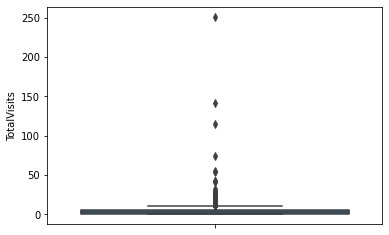

In [20]:
sea.boxplot(y=leads.TotalVisits)
plt.show()


<div class="alert alert-block alert-info">
    
### Observation:
    
- We can see strong outliers at the top of the box plot.
    
</div>

In [21]:
leads.TotalVisits.describe(percentiles=[0.5, 0.7, 0.9, 0.95, 0.99,1])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
50%         3.000000
70%         4.000000
90%         7.000000
95%        10.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

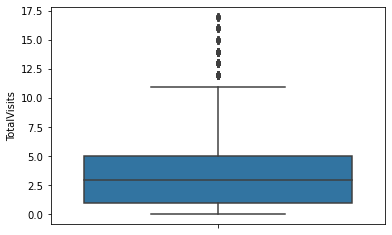

In [22]:
#Outlier Treatment: Remove top of the Column Outlier values


Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
sea.boxplot(y=leads['TotalVisits'])
plt.show()

In [23]:
# Total percentage of rows droped Till now.
((allLeads.shape[0]-leads.shape[0])*100)/allLeads.shape[0]

2.380952380952381

In [24]:
# Null Value 

leads.TotalVisits.isnull().sum()

0

### Analysising Total Time Spent on Website

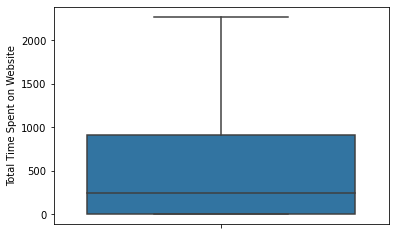

In [25]:

sea.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [26]:
leads['Total Time Spent on Website'].describe(percentiles=[0.5, 0.7, 0.9, 0.95, 0.99,1])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
50%       243.000000
70%       684.300000
90%      1371.000000
95%      1554.050000
99%      1836.620000
100%     2272.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [27]:
# Checking for null values

leads['Total Time Spent on Website'].isnull().sum()

0


<div class="alert alert-block alert-info">
    
### Observation:
    
- No outliers are found.
- No Null values.
    
</div>

### Analysising Page Views Per Visit

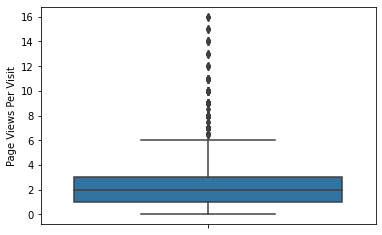

In [28]:

sea.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [29]:
leads['Page Views Per Visit'].describe(percentiles=[0.5, 0.7, 0.9, 0.95, 0.99,1])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
50%         2.000000
70%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
100%       16.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [30]:
((leads.shape[0]-leads[leads['Page Views Per Visit']<=9.0].shape[0])*100)/leads.shape[0]

0.7427937915742794


<div class="alert alert-block alert-info">
    
### Observation:
    
- Removing outliers will only impact 0.74 or in rounded form 1 percent of data, so we can go ahead with it.
    
</div>

In [31]:
# Removing outliers will only impact 1 percent of data, so we can go ahead with it.

leads=leads[leads['Page Views Per Visit']<=9.0]

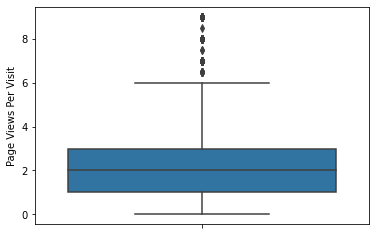

In [32]:
sea.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [33]:
# Checking for null values

leads['Page Views Per Visit'].isnull().sum()

0

## For Categorical Variables Imputing nulls and Analaysing and grouping unique values

In [34]:
leads[cat_col]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,NaN,Other Metro Cities,No,SMS Sent


In [35]:
round(100*(leads[cat_col].isnull().sum()/len(leads[cat_col].index)), 2).sort_values(ascending=False)
# Null value percentage for categorical variables

City                                             39.96
Tags                                             36.68
Specialization                                   36.68
What matters most to you in choosing a course    29.72
What is your current occupation                  29.52
Country                                          25.95
Lead Source                                       0.32
Lead Origin                                       0.00
Newspaper                                         0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Search                                            0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Last Activity                                     0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Last Notab

In [36]:
# Functions for future use

def groupValues(colName):
    allValues=(leads[colName].value_counts(dropna=False)*100)/leads[colName].shape[0]
    valuetochnage= allValues[allValues<=1].keys()
    leads[colName]=leads[colName].apply(lambda x: 'Others' if x in valuetochnage else x)
    print("Values Which are Grouped as 'Others':",valuetochnage)
    
def valueCountPercentage(colName):
    print((leads[colName].value_counts(dropna=False)*100)/leads[colName].shape[0])
    
def countplot(colName):
    s1=sea.countplot(leads[colName])
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

### Analysising City

In [37]:
valueCountPercentage('City')

NaN                            39.964258
Mumbai                         34.725790
Thane & Outskirts               8.075505
Other Cities                    7.472356
Other Cities of Maharashtra     4.892215
Other Metro Cities              4.065676
Tier II Cities                  0.804200
Name: City, dtype: float64


In [38]:
leads['City'].mode()[0]

'Mumbai'

In [39]:
#imputing null values with Mode

leads['City'] = leads['City'].replace(np.nan,leads['City'].mode()[0])

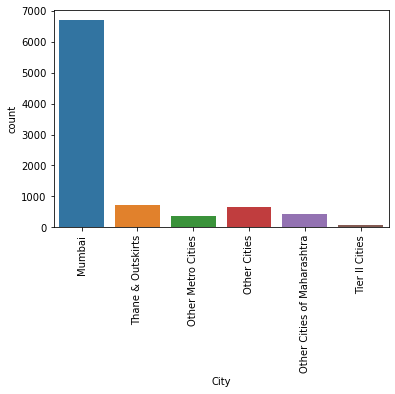

In [40]:
countplot('City')

In [41]:
valueCountPercentage('City')

Mumbai                         74.690048
Thane & Outskirts               8.075505
Other Cities                    7.472356
Other Cities of Maharashtra     4.892215
Other Metro Cities              4.065676
Tier II Cities                  0.804200
Name: City, dtype: float64



<div class="alert alert-block alert-info">
    
### Observation:
    
- We will not be removing city variable as Mumbai does have highest perctage of value but other variables also covering remaining 30 percent.
    
</div>


### Analysising Tags

In [42]:
valueCountPercentage('Tags')

NaN                                                  36.680442
Will revert after reading the email                  22.361220
Ringing                                              12.978890
Interested in other courses                           5.640567
Already a student                                     5.149112
Closed by Horizzon                                    3.239138
switched off                                          2.647157
Busy                                                  2.044008
Lost to EINS                                          1.887635
Not doing further education                           1.530213
Interested  in full time MBA                          1.295655
Graduation in progress                                1.228638
invalid number                                        0.904725
Diploma holder (Not Eligible)                         0.703675
wrong number given                                    0.513794
opp hangup                                            0

In [43]:
leads['Tags'].mode()[0]

'Will revert after reading the email'

In [44]:
#imputing null values with Mode

leads['Tags'] = leads['Tags'].replace(np.nan,leads['Tags'].mode()[0])

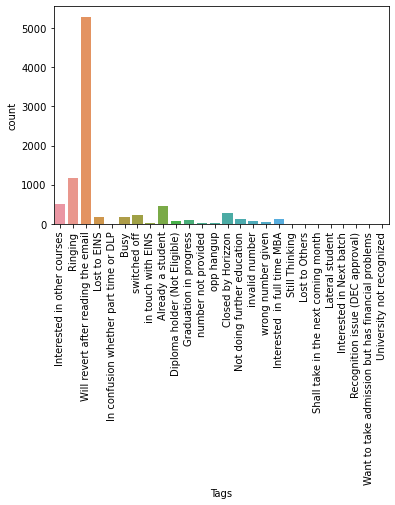

In [45]:
countplot('Tags')

<div class="alert alert-block alert-info">
    
### Observation:
    
- To reduce variable in futher analysis we can group values of 'Tags' which are less then or equal to 1 percent.
    
</div>



In [46]:
groupValues('Tags')

Values Which are Grouped as 'Others': Index(['invalid number', 'Diploma holder (Not Eligible)', 'wrong number given',
       'opp hangup', 'number not provided', 'in touch with EINS',
       'Lost to Others', 'Still Thinking',
       'In confusion whether part time or DLP', 'Interested in Next batch',
       'Want to take admission but has financial problems', 'Lateral student',
       'Shall take in the next coming month', 'University not recognized',
       'Recognition issue (DEC approval)'],
      dtype='object')


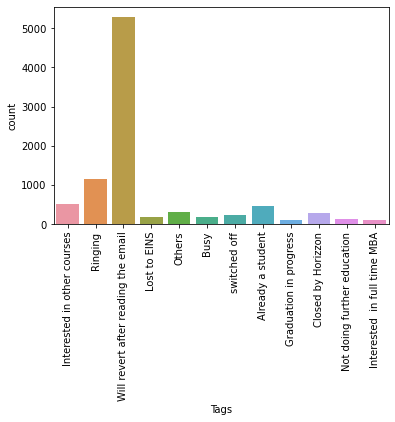

In [47]:
countplot('Tags')

### Analysising Specialization

In [48]:
valueCountPercentage('Specialization')

NaN                                  36.680442
Finance Management                   10.555121
Human Resource Management             9.158941
Marketing Management                  9.103094
Operations Management                 5.528873
Business Administration               4.356082
IT Projects Management                4.020999
Supply Chain Management               3.775271
Banking, Investment And Insurance     3.630068
Media and Advertising                 2.200380
Travel and Tourism                    2.111024
International Business                1.909974
Healthcare Management                 1.686586
E-COMMERCE                            1.195130
Hospitality Management                1.195130
Retail Management                     1.061097
Rural and Agribusiness                0.781861
E-Business                            0.625489
Services Excellence                   0.424439
Name: Specialization, dtype: float64



<div class="alert alert-block alert-info">
    
### Observation:
    
- Specialization is something which is not necessary that every candidate will have, so will impute null values with "Not Specified".
    
</div>

In [49]:
#imputing null values with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan,'Not Specified')

In [50]:
valueCountPercentage('Specialization')

Not Specified                        36.680442
Finance Management                   10.555121
Human Resource Management             9.158941
Marketing Management                  9.103094
Operations Management                 5.528873
Business Administration               4.356082
IT Projects Management                4.020999
Supply Chain Management               3.775271
Banking, Investment And Insurance     3.630068
Media and Advertising                 2.200380
Travel and Tourism                    2.111024
International Business                1.909974
Healthcare Management                 1.686586
E-COMMERCE                            1.195130
Hospitality Management                1.195130
Retail Management                     1.061097
Rural and Agribusiness                0.781861
E-Business                            0.625489
Services Excellence                   0.424439
Name: Specialization, dtype: float64



<div class="alert alert-block alert-info">
    
### Observation:
    
- To reduce variable in futher analysis we can group values of 'Specialization' which are less then or equal to 1 percent as others.
    
</div>

In [51]:
groupValues('Specialization')

Values Which are Grouped as 'Others': Index(['Rural and Agribusiness', 'E-Business', 'Services Excellence'], dtype='object')


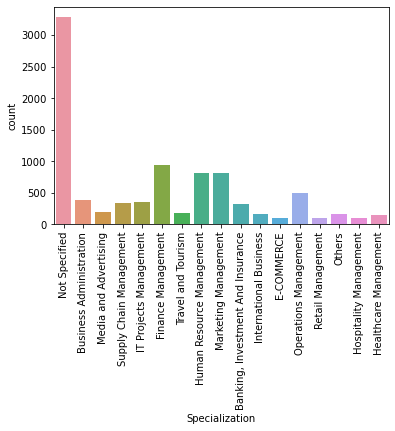

In [52]:
countplot('Specialization')

### Analysising "What matters most to you in choosing a course"

In [53]:
valueCountPercentage('What matters most to you in choosing a course')

Better Career Prospects      70.255780
NaN                          29.721881
Flexibility & Convenience     0.011169
Other                         0.011169
Name: What matters most to you in choosing a course, dtype: float64


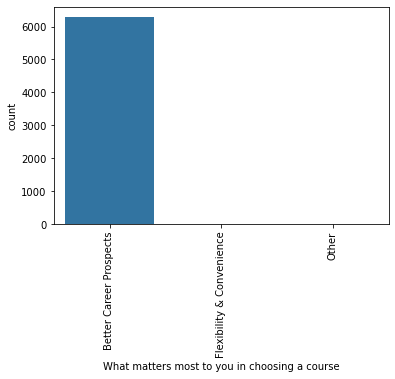

In [54]:
countplot('What matters most to you in choosing a course')


<div class="alert alert-block alert-info">
    
### Observation:
    
- It does not make sense for keeping this column as if we impute the null value with "Better career Prospect", "Better career prospect" will hold 90% of the value. So droping this variable.
    
</div>

In [55]:
leads.drop(columns='What matters most to you in choosing a course',inplace=True)

### Analysising "What is your current occupation"

In [56]:
valueCountPercentage('What is your current occupation')

Unemployed              60.426673
NaN                     29.520831
Working Professional     7.450017
Student                  2.278566
Other                    0.145203
Housewife                0.100525
Businessman              0.078186
Name: What is your current occupation, dtype: float64


In [57]:
#imputing null values with Mode

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [58]:
valueCountPercentage('What is your current occupation')

Unemployed              89.947504
Working Professional     7.450017
Student                  2.278566
Other                    0.145203
Housewife                0.100525
Businessman              0.078186
Name: What is your current occupation, dtype: float64



<div class="alert alert-block alert-info">
    
### Observation:
    
- To reduce variable in futher analysis we can group values of 'What is your current occupation' which are less then or equal to 1 percent as others.
    
</div>

In [59]:
groupValues('What is your current occupation')

Values Which are Grouped as 'Others': Index(['Other', 'Housewife', 'Businessman'], dtype='object')


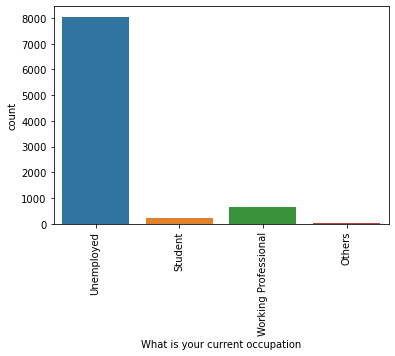

In [60]:
countplot('What is your current occupation')

### Analysising "Country"

In [61]:
valueCountPercentage('Country')

India                   70.892438
NaN                     25.946610
United States            0.759522
United Arab Emirates     0.580811
Singapore                0.268067
Saudi Arabia             0.234558
United Kingdom           0.167542
Australia                0.145203
Qatar                    0.111694
Hong Kong                0.078186
Bahrain                  0.078186
Oman                     0.067017
France                   0.067017
South Africa             0.044678
Kuwait                   0.044678
Germany                  0.044678
unknown                  0.044678
Nigeria                  0.044678
Canada                   0.044678
Sweden                   0.033508
China                    0.022339
Belgium                  0.022339
Asia/Pacific Region      0.022339
Uganda                   0.022339
Italy                    0.022339
Ghana                    0.022339
Bangladesh               0.022339
Philippines              0.022339
Liberia                  0.011169
Vietnam       

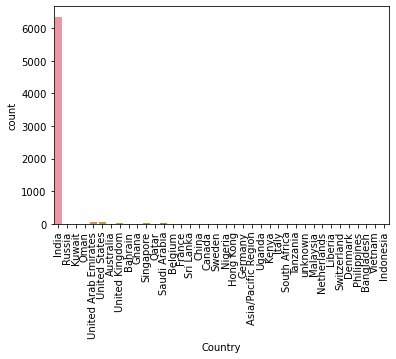

In [62]:
countplot('Country')


<div class="alert alert-block alert-info">
    
### Observation:
    
- After imputing null with 'India' Country column will have India with 95% coverage, so it is fair to drop this column.
    
</div>

In [63]:
leads.drop(columns='Country',inplace=True)

### Analysising "Lead Source "

In [64]:
valueCountPercentage('Lead Source')

Google               31.676533
Direct Traffic       27.912432
Olark Chat           19.557690
Organic Search       12.197029
Reference             4.936893
Welingak Website      1.440858
Referral Sites        1.306825
Facebook              0.346253
NaN                   0.323914
bing                  0.067017
google                0.055847
Click2call            0.044678
Social Media          0.022339
Live Chat             0.022339
Pay per Click Ads     0.011169
blog                  0.011169
WeLearn               0.011169
welearnblog_Home      0.011169
youtubechannel        0.011169
testone               0.011169
Press_Release         0.011169
NC_EDM                0.011169
Name: Lead Source, dtype: float64


In [65]:
leads['Lead Source'].mode()

0    Google
Name: Lead Source, dtype: object

In [66]:
#imputing null values with Mode

leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Google')

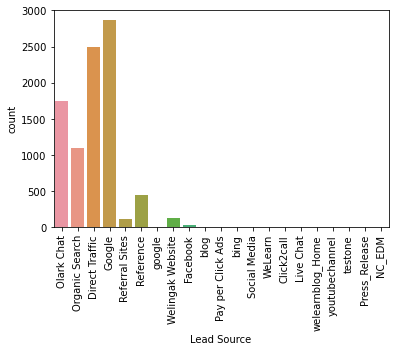

In [67]:
countplot('Lead Source')


<div class="alert alert-block alert-info">
    
### Observation:
    
- To reduce variable in futher analysis we can group values of lead source which are less then or equal to 1 percent as others.
    
</div>

In [68]:
groupValues('Lead Source')

Values Which are Grouped as 'Others': Index(['Facebook', 'bing', 'google', 'Click2call', 'Social Media', 'Live Chat',
       'youtubechannel', 'Press_Release', 'testone', 'Pay per Click Ads',
       'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'],
      dtype='object')


In [69]:
valueCountPercentage('Lead Source')

Google              32.000447
Direct Traffic      27.912432
Olark Chat          19.557690
Organic Search      12.197029
Reference            4.936893
Welingak Website     1.440858
Referral Sites       1.306825
Others               0.647828
Name: Lead Source, dtype: float64


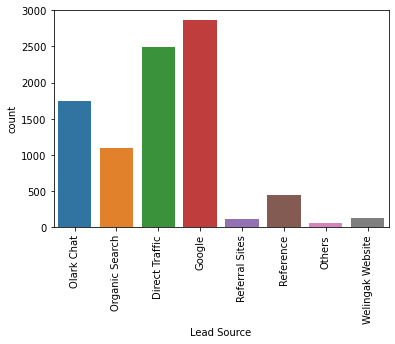

In [70]:
countplot('Lead Source')

### Analysising "Lead Origin"

Landing Page Submission    53.267061
API                        39.606836
Lead Add Form               6.779850
Lead Import                 0.346253
Name: Lead Origin, dtype: float64
None


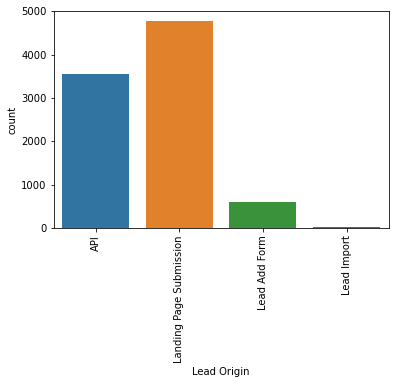

In [71]:
print(valueCountPercentage('Lead Origin'))
countplot('Lead Origin')


<div class="alert alert-block alert-info">
    
### Observation:
    
- All looks good nothing need to impute or grouped.
    
</div>

### Analysising "Newspaper"

No     99.988831
Yes     0.011169
Name: Newspaper, dtype: float64
None


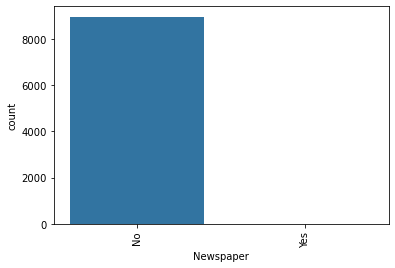

In [72]:
print(valueCountPercentage('Newspaper'))
countplot('Newspaper')


<div class="alert alert-block alert-info">
    
### Observation:
    
- Removing Newspaper as value "No" covering 99% percent of the rows.
    
</div>

In [73]:
leads.drop(columns='Newspaper',inplace=True)

### Analysising "A free copy of Mastering The Interview"

No     68.747906
Yes    31.252094
Name: A free copy of Mastering The Interview, dtype: float64
None


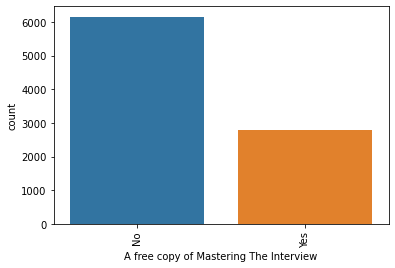

In [74]:
print(valueCountPercentage('A free copy of Mastering The Interview'))
countplot('A free copy of Mastering The Interview')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  All looks good nothing need to impute or grouped.
    
</div>

### Analysising "Through Recommendations"

No     99.932983
Yes     0.067017
Name: Through Recommendations, dtype: float64
None


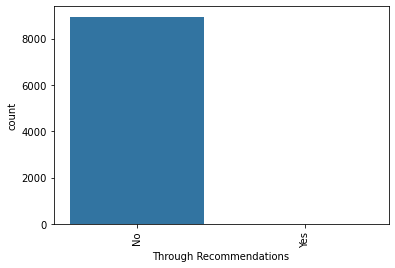

In [75]:
print(valueCountPercentage('Through Recommendations'))
countplot('Through Recommendations')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  Removing Through Recommendations as value "No" covering 99% percent of the rows.
    
</div>

In [76]:
leads.drop(columns='Through Recommendations',inplace=True)

### Analysising "Digital Advertisement"

No     99.966492
Yes     0.033508
Name: Digital Advertisement, dtype: float64
None


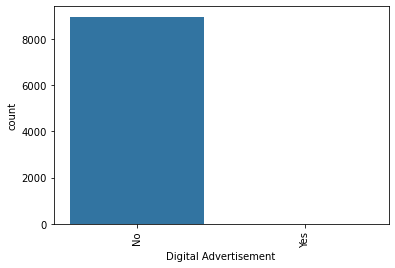

In [77]:
print(valueCountPercentage('Digital Advertisement'))
countplot('Digital Advertisement')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  Removing Digital Advertisement as value "No" covering 99% percent of the rows.
    
</div>

In [78]:
leads.drop(columns='Digital Advertisement',inplace=True)

### Analysising "Search"

No     99.854797
Yes     0.145203
Name: Search, dtype: float64
None


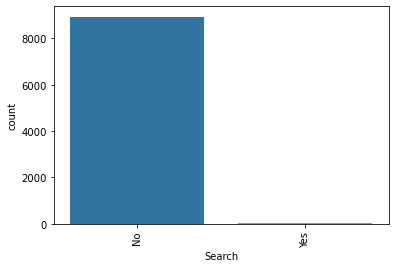

In [79]:
print(valueCountPercentage('Search'))
countplot('Search')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  Removing Search as value "No" covering 99% percent of the rows.
    
</div>

In [80]:
leads.drop(columns='Search',inplace=True)

### Analysising "X Education Forums"

No    100.0
Name: X Education Forums, dtype: float64
None


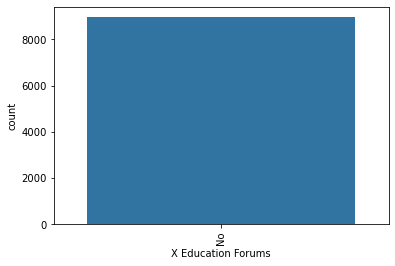

In [81]:
print(valueCountPercentage('X Education Forums'))
countplot('X Education Forums')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  Removing X Education Forums as value "No" covering 100% percent of the rows.
    
</div>

In [82]:
leads.drop(columns='X Education Forums',inplace=True)

### Analysising "Newspaper Article"

No     99.988831
Yes     0.011169
Name: Newspaper Article, dtype: float64
None


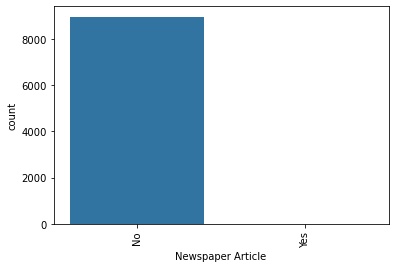

In [83]:
print(valueCountPercentage('Newspaper Article'))
countplot('Newspaper Article')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  Removing Newspaper Article as value "No" covering 99% percent of the rows.
    
</div>

In [84]:
leads.drop(columns='Newspaper Article',inplace=True)

### Analysising "Last Activity"

Email Opened                    37.864403
SMS Sent                        30.157489
Olark Chat Conversation         10.789679
Page Visited on Website          6.634648
Converted to Lead                4.780520
Email Bounced                    3.462527
Email Link Clicked               2.948732
Form Submitted on Website        1.273316
Unreachable                      0.982911
Unsubscribed                     0.670166
Had a Phone Conversation         0.268067
Approached upfront               0.055847
View in browser link Clicked     0.044678
Email Received                   0.022339
Email Marked Spam                0.022339
Visited Booth in Tradeshow       0.011169
Resubscribed to emails           0.011169
Name: Last Activity, dtype: float64
None


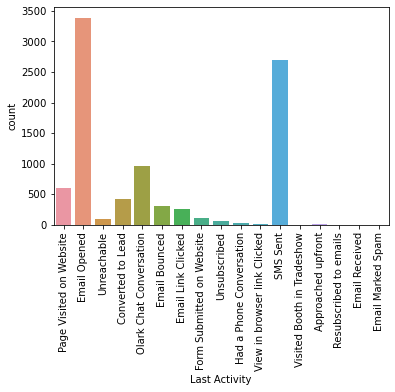

In [85]:
print(valueCountPercentage('Last Activity'))
countplot('Last Activity')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  No need for imputation, but grouping will be needed for values with less then 1% row coverage.
    
</div>

In [86]:
groupValues('Last Activity')

Values Which are Grouped as 'Others': Index(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
       'Approached upfront', 'View in browser link Clicked', 'Email Received',
       'Email Marked Spam', 'Visited Booth in Tradeshow',
       'Resubscribed to emails'],
      dtype='object')


Email Opened                 37.864403
SMS Sent                     30.157489
Olark Chat Conversation      10.789679
Page Visited on Website       6.634648
Converted to Lead             4.780520
Email Bounced                 3.462527
Email Link Clicked            2.948732
Others                        2.088685
Form Submitted on Website     1.273316
Name: Last Activity, dtype: float64
None


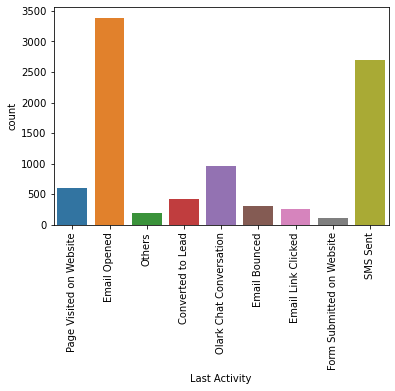

In [87]:
print(valueCountPercentage('Last Activity'))
countplot('Last Activity')

### Analysising "Do Not Call"

No     99.977661
Yes     0.022339
Name: Do Not Call, dtype: float64
None


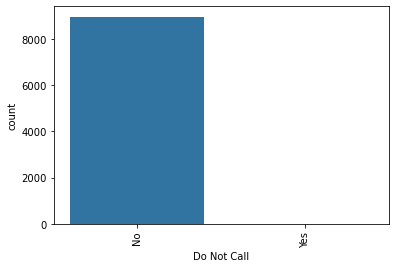

In [88]:
print(valueCountPercentage('Do Not Call'))
countplot('Do Not Call')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  Removing 'Do Not Call' as value "No" covering 99% percent of the rows.
    
</div>

In [89]:
leads.drop(columns='Do Not Call',inplace=True)

### Analysising "Do Not Email  "

No     92.2149
Yes     7.7851
Name: Do Not Email, dtype: float64
None


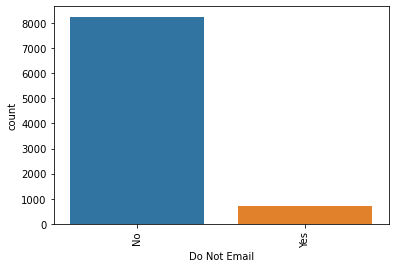

In [90]:
print(valueCountPercentage('Do Not Email'))
countplot('Do Not Email')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  No Imputation or grouping is needed.
    
</div>

### Analysising "Last Notable Activity"

Modified                        36.010276
Email Opened                    31.151569
SMS Sent                        23.936111
Page Visited on Website          3.216799
Olark Chat Conversation          2.032838
Email Link Clicked               1.898805
Email Bounced                    0.658997
Unsubscribed                     0.513794
Unreachable                      0.357422
Had a Phone Conversation         0.145203
Email Marked Spam                0.022339
Approached upfront               0.011169
Resubscribed to emails           0.011169
View in browser link Clicked     0.011169
Form Submitted on Website        0.011169
Email Received                   0.011169
Name: Last Notable Activity, dtype: float64
None


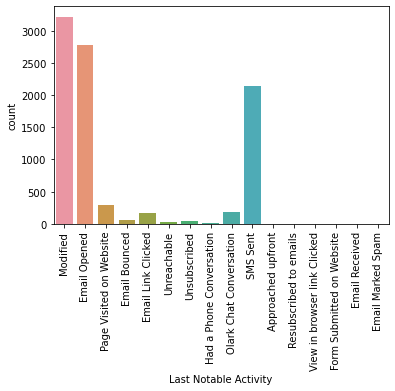

In [91]:
print(valueCountPercentage('Last Notable Activity'))
countplot('Last Notable Activity')


<div class="alert alert-block alert-info">
    
### Observation:
    
-  No need for imputation, but grouping will be needed for values with less then 1% row coverage.
    
</div>

In [92]:
groupValues('Last Notable Activity')

Values Which are Grouped as 'Others': Index(['Email Bounced', 'Unsubscribed', 'Unreachable',
       'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received'],
      dtype='object')


Modified                   36.010276
Email Opened               31.151569
SMS Sent                   23.936111
Page Visited on Website     3.216799
Olark Chat Conversation     2.032838
Email Link Clicked          1.898805
Others                      1.753602
Name: Last Notable Activity, dtype: float64
None


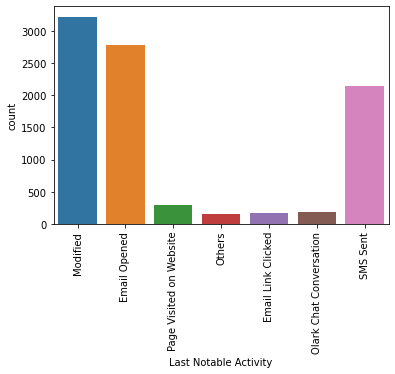

In [93]:
print(valueCountPercentage('Last Notable Activity'))
countplot('Last Notable Activity')

## Final Senity check on Data 

In [94]:
leads.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [95]:
#Checking data type
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [96]:
#Checking Null Values
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [97]:
#Total Row retained in comparison to original 
round((leads.shape[0]*100)/9240,2)

96.89

In [98]:
##Total Column retained in comparison to original
round((leads.shape[1]*100)/37,2)

37.84


<div class="alert alert-block alert-info">
    
### Observation:
    
-  After data cleaning process 97% of rows are retained and 38% of columns are retained.
    
</div>

# STEP 3: EDA & Data Visualisation

### Visualising numerical varibles

In [99]:
#Numerical Variables
plotdata = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

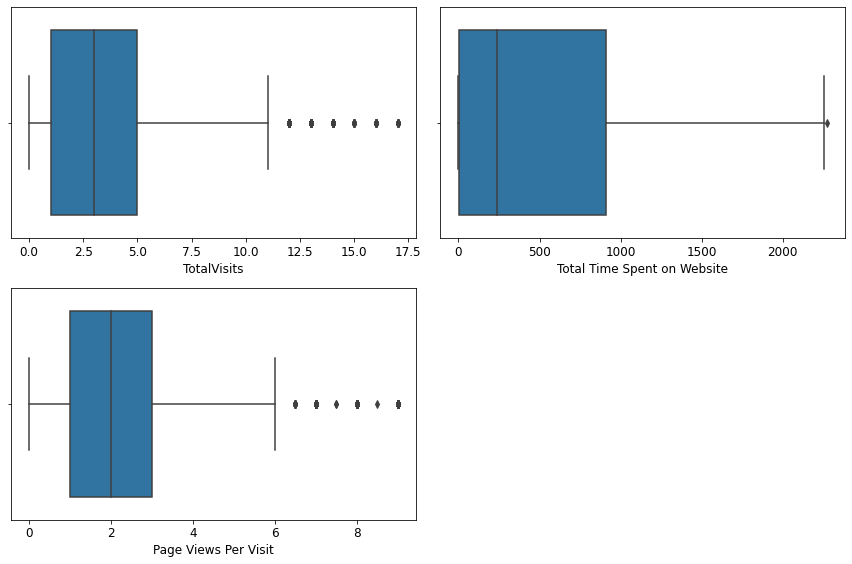

In [100]:
# Visualising numerical varibles
# selecting numerical variables

var = plotdata.columns

# Box plot
col = 2
row = len(var)//col+1
plt.figure(figsize=(12,8))
plt.rc('font', size=12)
for i in list(enumerate(var)):
    plt.subplot(row, col, i[0]+1)
    sea.boxplot(leads[i[1]])    
plt.tight_layout()   
plt.show()


<div class="alert alert-block alert-info">
    
### Observation:
    
- Majority of people who apply for course visit 1-5 times on website.
- Majority of people who apply for course spent arround 1-15 min on the website.
- Majority of people who apply for course browse 1-3 pages on the website.
    
</div>


<Figure size 5760x4320 with 0 Axes>

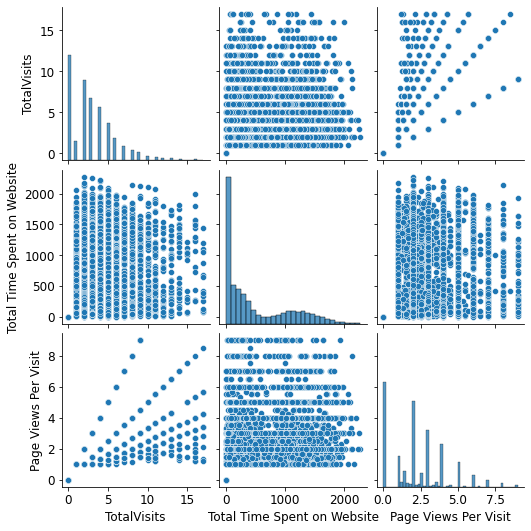

In [101]:
# Analysising corealtion between continous/numerical variables.
 
plt.figure(figsize=(80,60))
sea.pairplot(plotdata)
plt.show()


<div class="alert alert-block alert-info">
    
### Observation:
    
- We can see linear relationship between, total visits and page view per visit 
    
</div>



### Visulalising Categorical Variables

In [102]:
# Categorical Variables
colx=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
      'Specialization', 'What is your current occupation', 'Tags','City',
      'A free copy of Mastering The Interview','Last Notable Activity','Converted']

#       

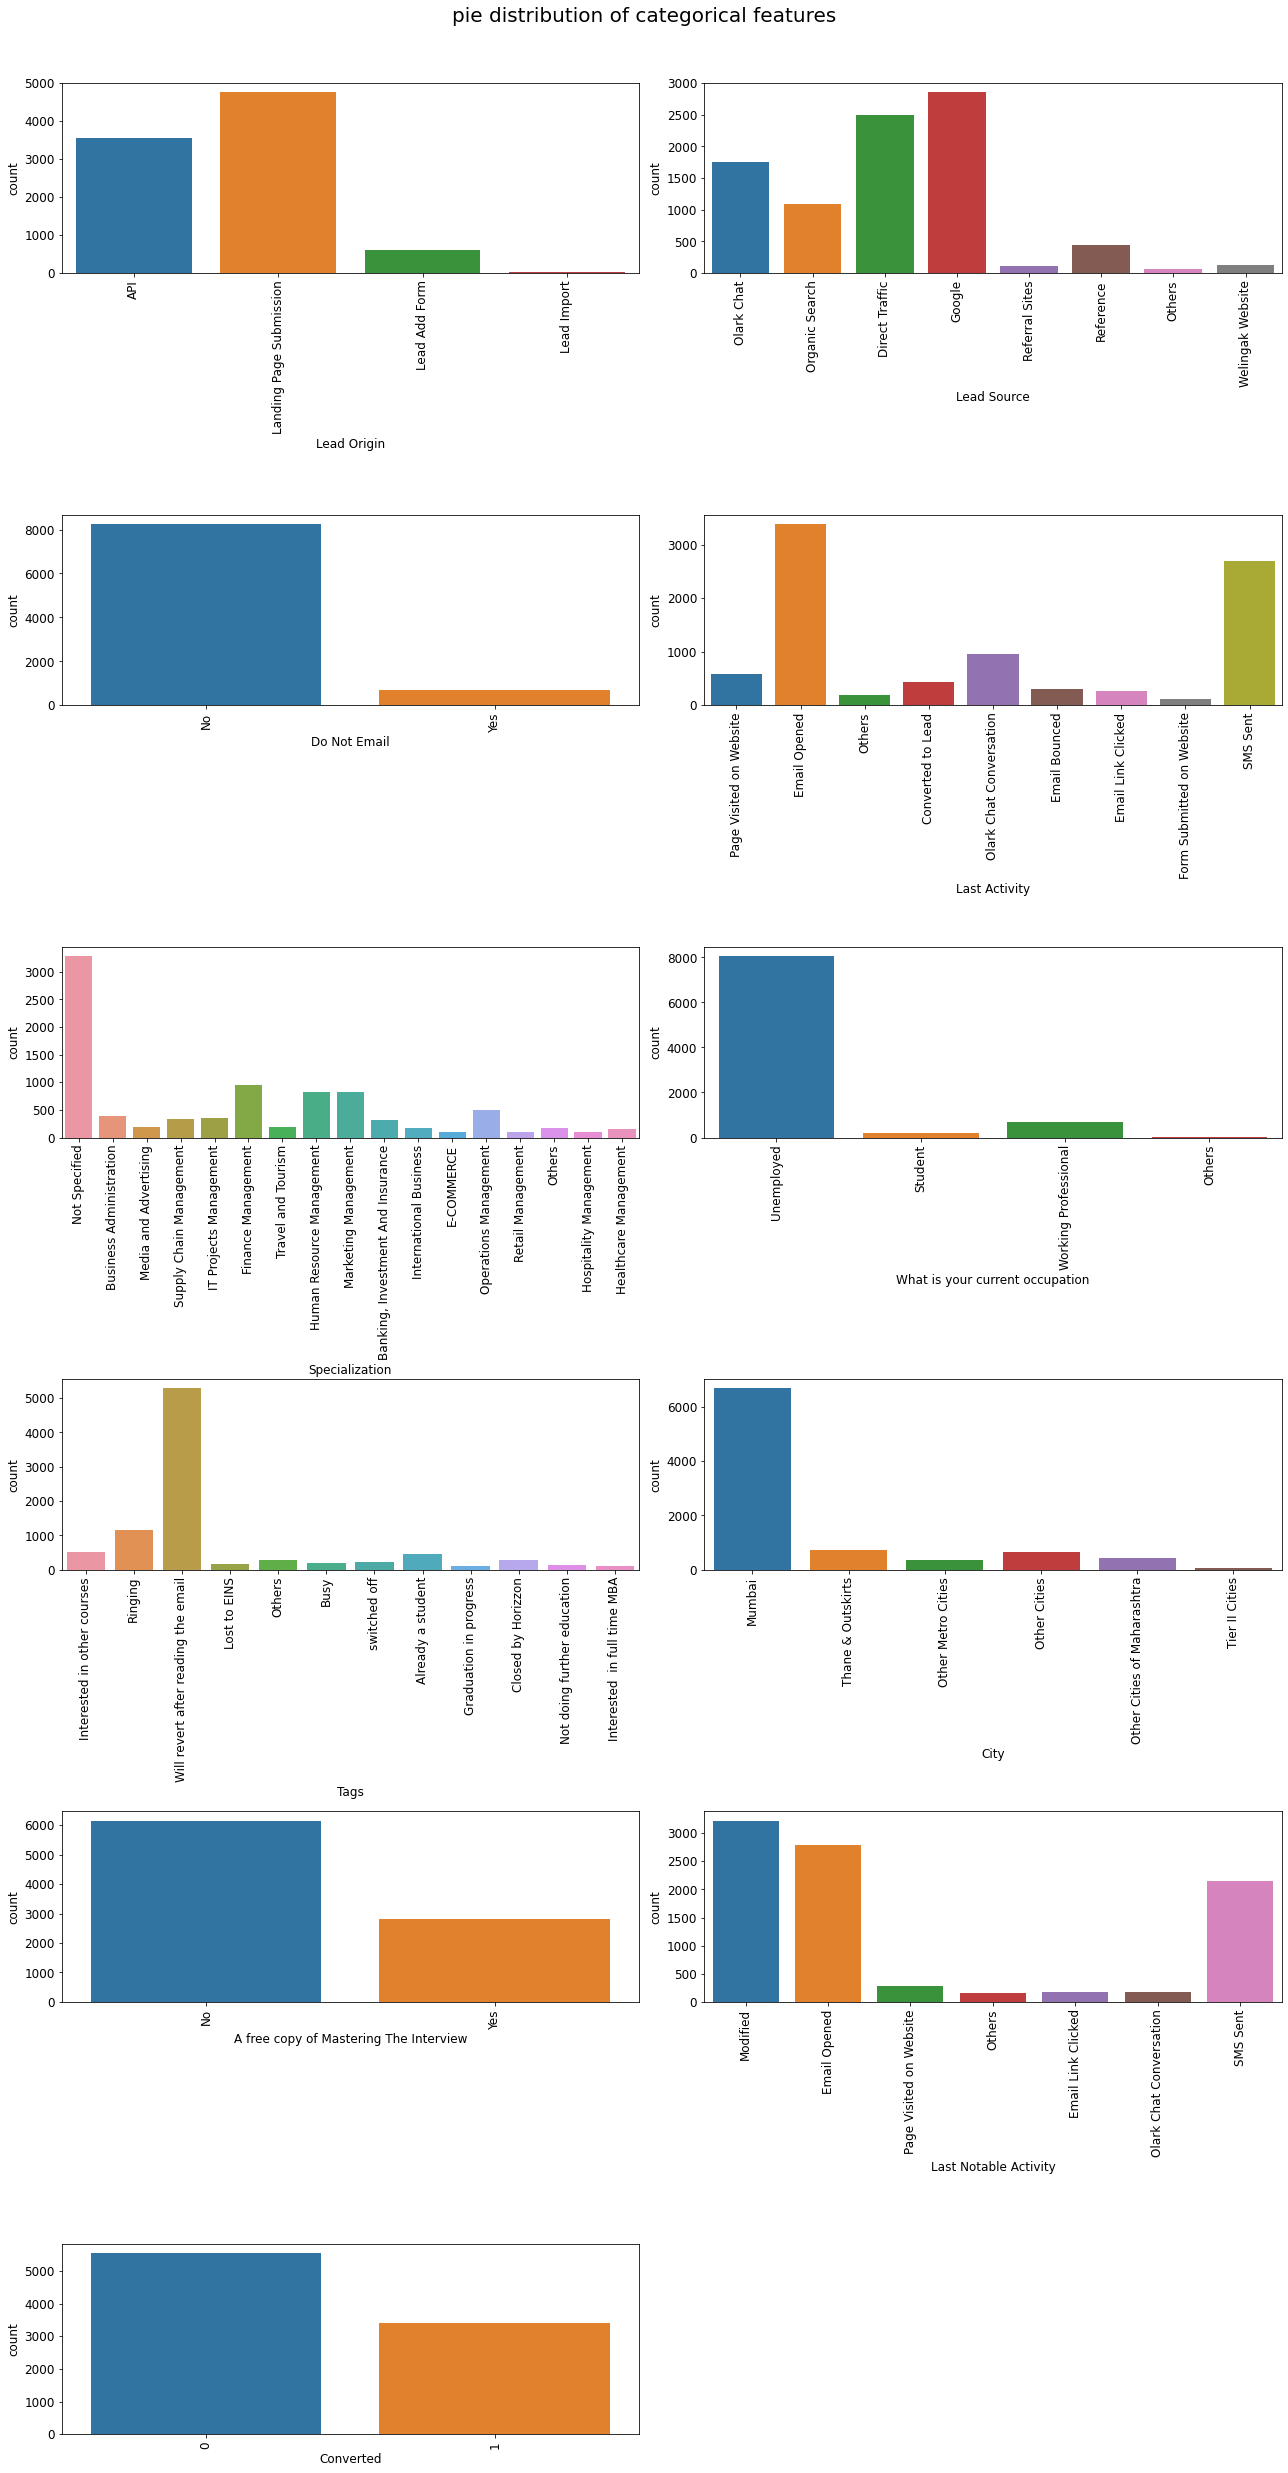

In [103]:
# Visulalising Categorical Variables using pie chart

df_piplot=leads[colx]
plt.figure(figsize=(18,35))
plt.suptitle('pie distribution of categorical features', fontsize=20)
for i in range(1,df_piplot.shape[1]+1):
    plt.subplot(6,2,i)
    s1=sea.countplot(df_piplot[df_piplot.keys()[i-1]])
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.tight_layout(pad=0.9)
    plt.subplots_adjust(top=0.95)
    
plt.show()


<div class="alert alert-block alert-info">
    
### Observation:
- Maximum leads are collected by landing page form submition.
- Maximum customers lands on webite by finding it though google search engine or by dirtectly typing web address of the website.
- Maximum customers prefer that we dont email them.
- It can be noticed that customers do open emails send by the compnay but dont open link in the email so often.
- For Specialization, customers are either does not have any specialization (it can also mean that they are student) or they are from management background.
- Maximum customers are either from Mumabai or near by mumbai.
- Data is very ballenced when we see or target variable.
    
</div>

### Visulalising categorical variables in respect to converted variable

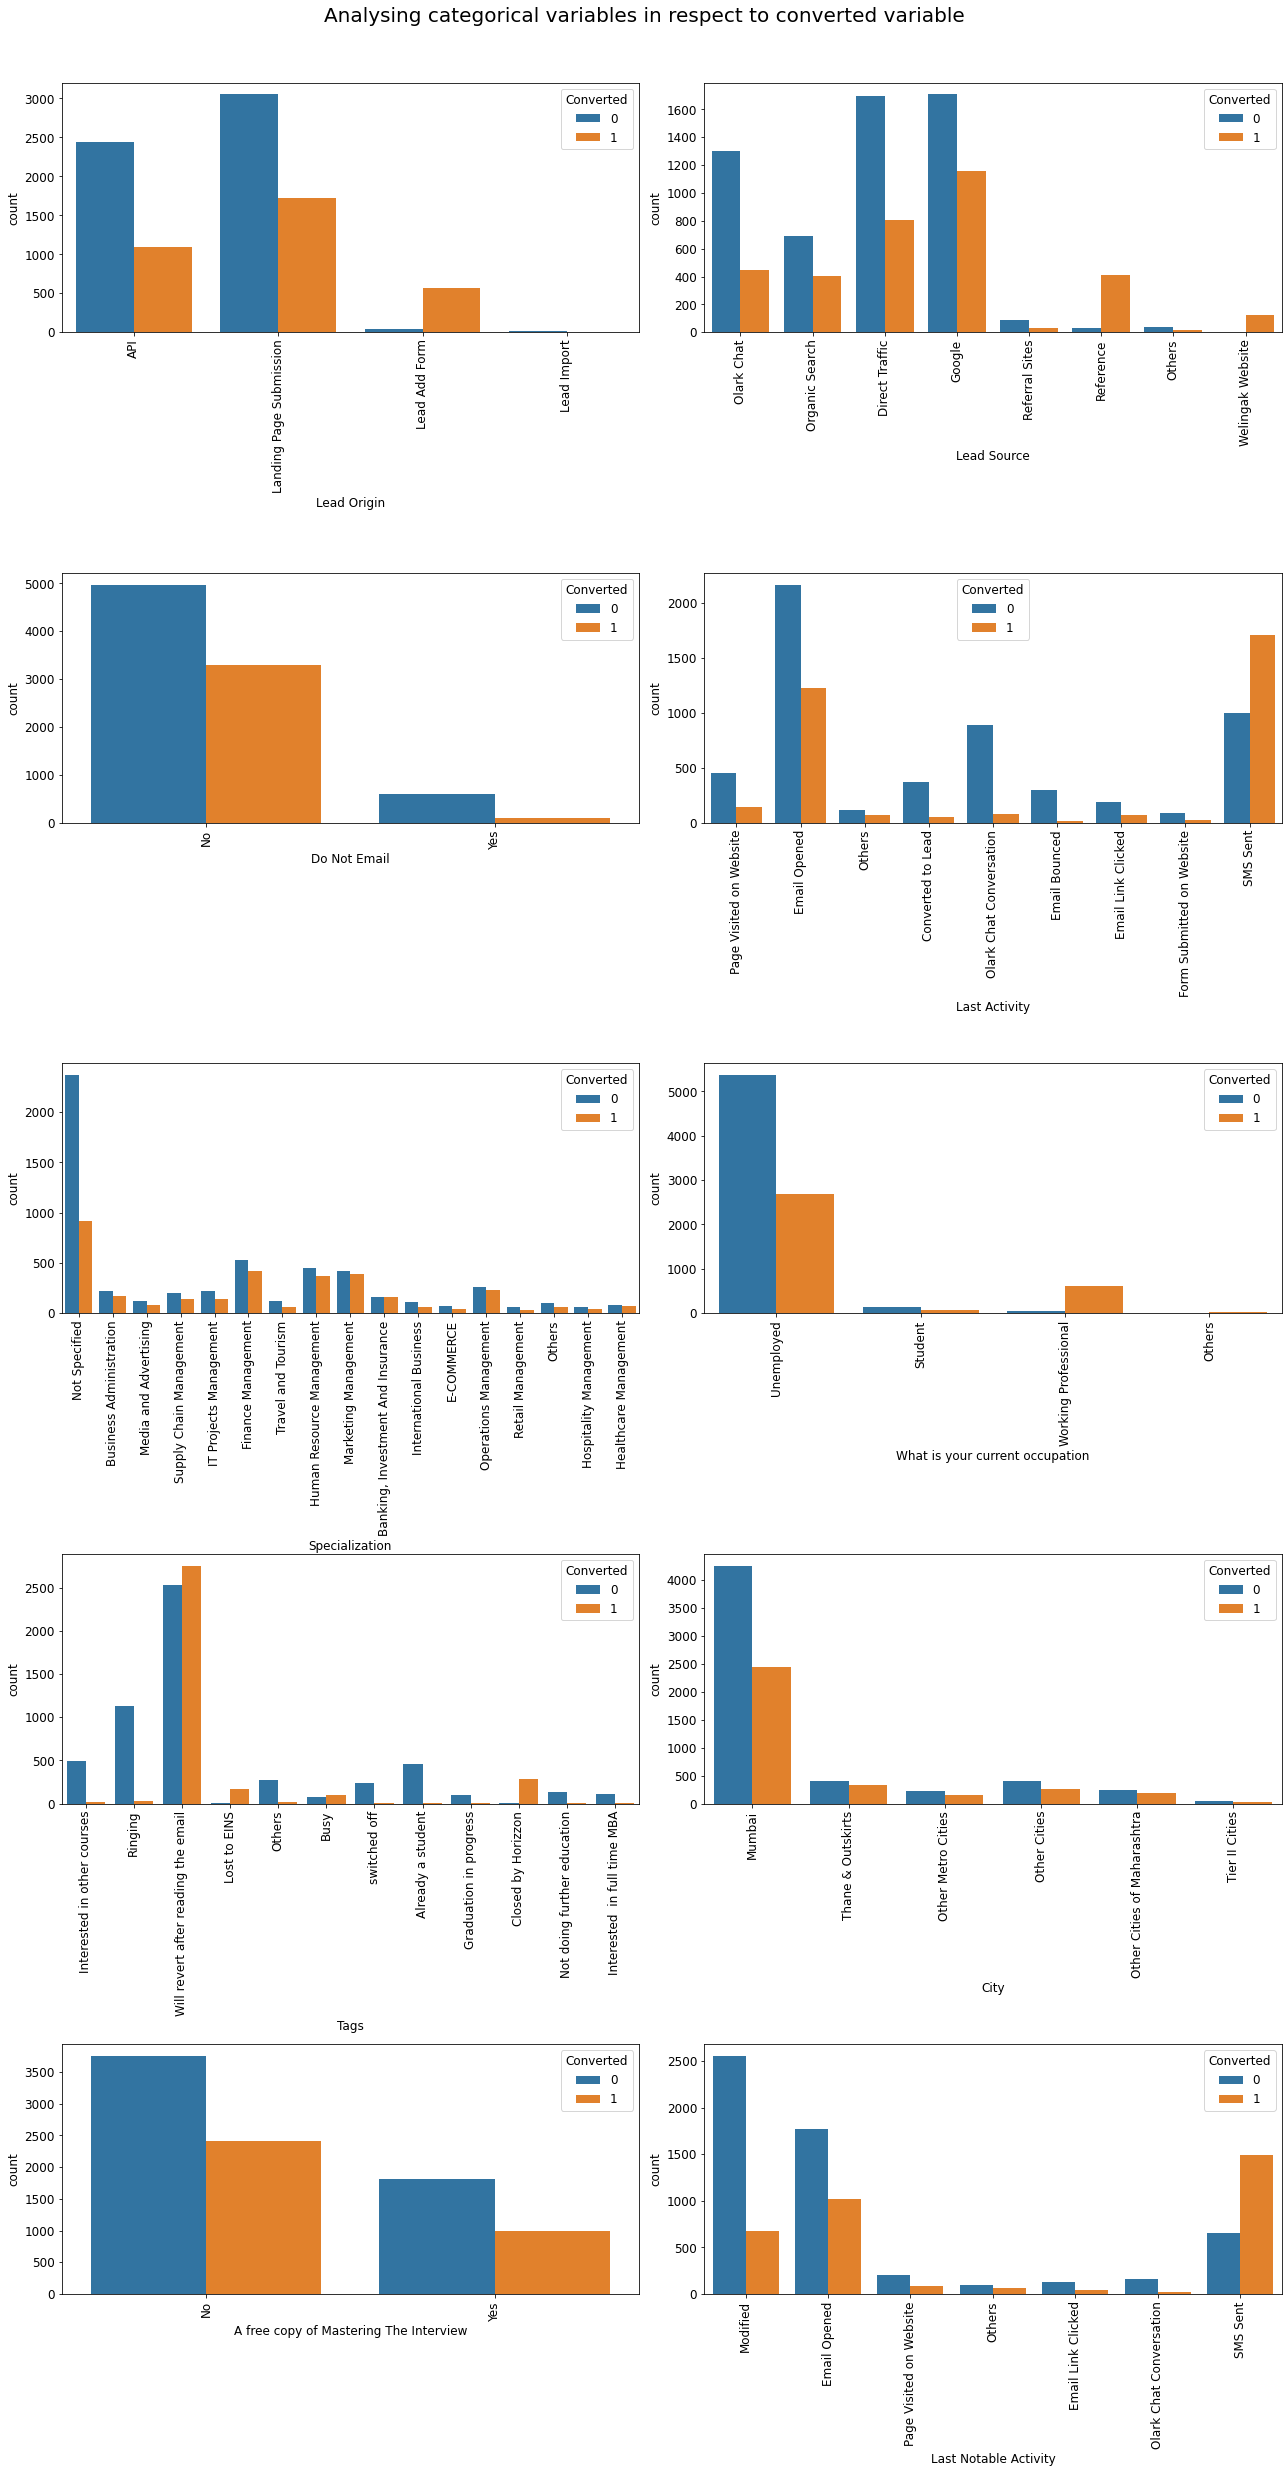

In [104]:
# Analysing categorical variables in respect to converted variable

colx=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
      'Specialization', 'What is your current occupation', 'Tags','City',
      'A free copy of Mastering The Interview','Last Notable Activity']

df_piplot=leads[colx]
plt.figure(figsize=(18,35))
plt.suptitle('Analysing categorical variables in respect to converted variable', fontsize=20)
for i in range(1,df_piplot.shape[1]+1):
    plt.subplot(5,2,i)
    s1=sea.countplot(df_piplot[df_piplot.keys()[i-1]],hue=leads.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.tight_layout(pad=0.9)
    plt.subplots_adjust(top=0.95)
    
plt.show()


<div class="alert alert-block alert-info">
    
### Observations:
- Leads which are from 'Add Form'has much higher chance of conversion.
- Leads from refrence has much higher chnance of conversion in compare to other source.
- Conversion of customers is much higher using SMS marketing in compare to email marketing.
- Working professionals has higher chance of conversion.
    
</div>

### Visulalising Numerical  variables in respect to converted variable

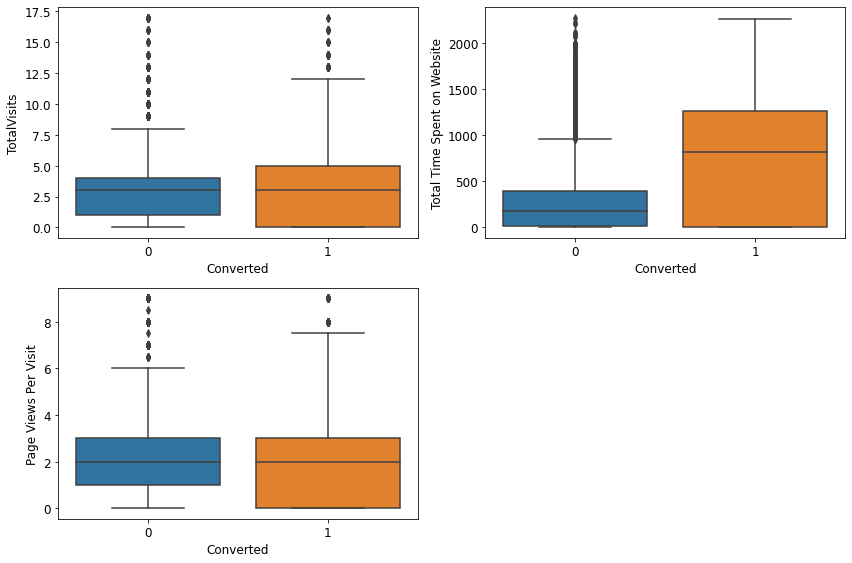

In [105]:
plotdata = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
var = plotdata.columns


# Box plot
col = 2
row = len(var)//col+1
plt.figure(figsize=(12,8))
plt.rc('font', size=12)
for i in list(enumerate(var)):
    plt.subplot(row, col, i[0]+1)
    sea.boxplot(data=leads,x=leads['Converted'],y=i[1])
plt.tight_layout()   
plt.show()


<div class="alert alert-block alert-info">
    
### Observations:
- Customers visting more on website tends to convert more.
- Customers who has more time spending on website tends to convert more.
    
</div>

In [106]:
#Checking corelation

corrdata=leads.corr()

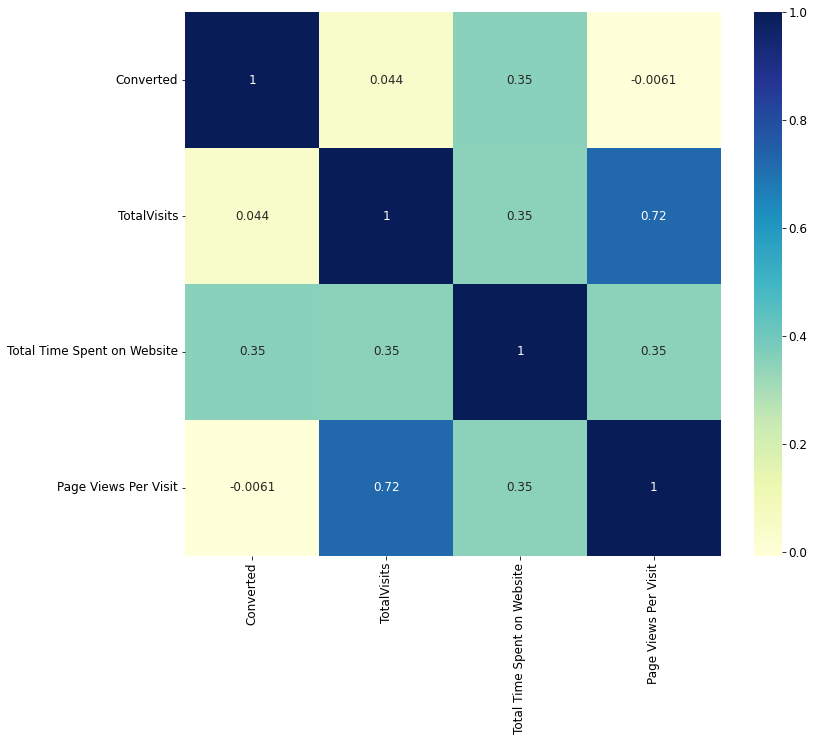

In [107]:
plt.figure(figsize=(12, 10))
sea.heatmap(corrdata,annot=True,cmap='YlGnBu')
plt.show()


<div class="alert alert-block alert-info">
    
### Observations:
- Total Visits has positive high corelation with pages vies per visit.
- Total time spend on website has positive high corelation with converted.
- Total visits has positive high corelation with Total time spent on website
    
</div>

# Step 4: Dummy Variable Creation

In [108]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [109]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [110]:
# List of variables which has only 2 values

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
leads[varlist] = leads[varlist].apply(binary_map)

In [111]:
#getting dummies and dropping the first column and adding the results to the master dataframe

dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [112]:
# working with columns in which we grouped variable as 'Others' 

dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


In [113]:
#droping orginal columns after dummy variable

leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1, inplace=True)

In [114]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Step 5: Splitting the Data into Training and Testing Sets

In [115]:
from sklearn.model_selection import train_test_split


y = leads['Converted']

X=leads.drop('Converted', axis=1)

In [116]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [117]:
X_train.shape

(6267, 62)

In [118]:
X_test.shape

(2686, 62)

## Scaling

<div class="alert alert-block alert-info">

- Min-Max scaling (normalisation): Between 0 and 1, Standardisation (mean-0, sigma(standard daviation)-1)

- This time, we will use MinMax scaling. As number of outlier are not high.

- Normalisation: (x-xmin)/(xamax-xmin), Standardisation: (x-mu)/sigma

NOTE: The advantage of Standardisation over the other is that it doesn't compress the data between a particular range as in Min-Max scaling. This is useful, especially if there is are extreme data point (outlier).

</div>

In [119]:
X_train.nunique().sort_values(ascending=False)

Total Time Spent on Website                 1536
Page Views Per Visit                          59
TotalVisits                                   18
Tags_Will revert after reading the email       2
Last Notable Activity_Email Link Clicked       2
                                            ... 
Specialization_Operations Management           2
Specialization_Others                          2
Specialization_Retail Management               2
Specialization_Supply Chain Management         2
Tags_switched off                              2
Length: 62, dtype: int64

#### Scaling 'Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'

In [120]:
#scaling numeric columns

from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()

# num_cols=['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']

# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# X_train.head()


scaler = MinMaxScaler()
num_cols=['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [121]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.00000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,0.181633,0.210265,0.249155,0.528961,0.069411,0.00351,0.021063,0.905697,0.070369,0.076592,0.046753,0.040849,0.086166,0.008457,0.035743,0.041328,0.013084,0.106271,0.016914,0.011329,0.092548,0.037977,0.019786,0.087442,0.022499,0.052976,0.019148,0.011329,0.041008,0.019786,0.277326,0.319292,0.198979,0.119355,0.049465,0.013563,0.015637,0.047551,0.032871,0.029679,0.380724,0.013563,0.109781,0.062390,0.302537,0.018510,0.311792,0.359821,0.019946,0.030796,0.241583,0.053933,0.020903,0.031913,0.012446,0.012765,0.055050,0.017393,0.014361,0.127334,0.595341,0.027286
std,0.168187,0.241100,0.210483,0.499200,0.254172,0.05915,0.143605,0.292274,0.255788,0.265964,0.211126,0.197956,0.280631,0.091580,0.185663,0.199063,0.113645,0.308209,0.128960,0.105842,0.289821,0.191155,0.139276,0.282504,0.148311,0.224003,0.137056,0.105842,0.198326,0.139276,0.447714,0.466239,0.399264,0.324232,0.216855,0.115678,0.124078,0.212831,0.178312,0.169714,0.485604,0.115678,0.312642,0.241882,0.459393,0.134796,0.463262,0.479986,0.139825,0.172779,0.428077,0.225904,0.143072,0.175783,0.110875,0.112269,0.228097,0.130740,0.118983,0.333373,0.490865,0.162928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

<div class="alert alert-block alert-info">
    
### Observation:
- As above we can see all the featrues are now has min=0 and max=1
</div>

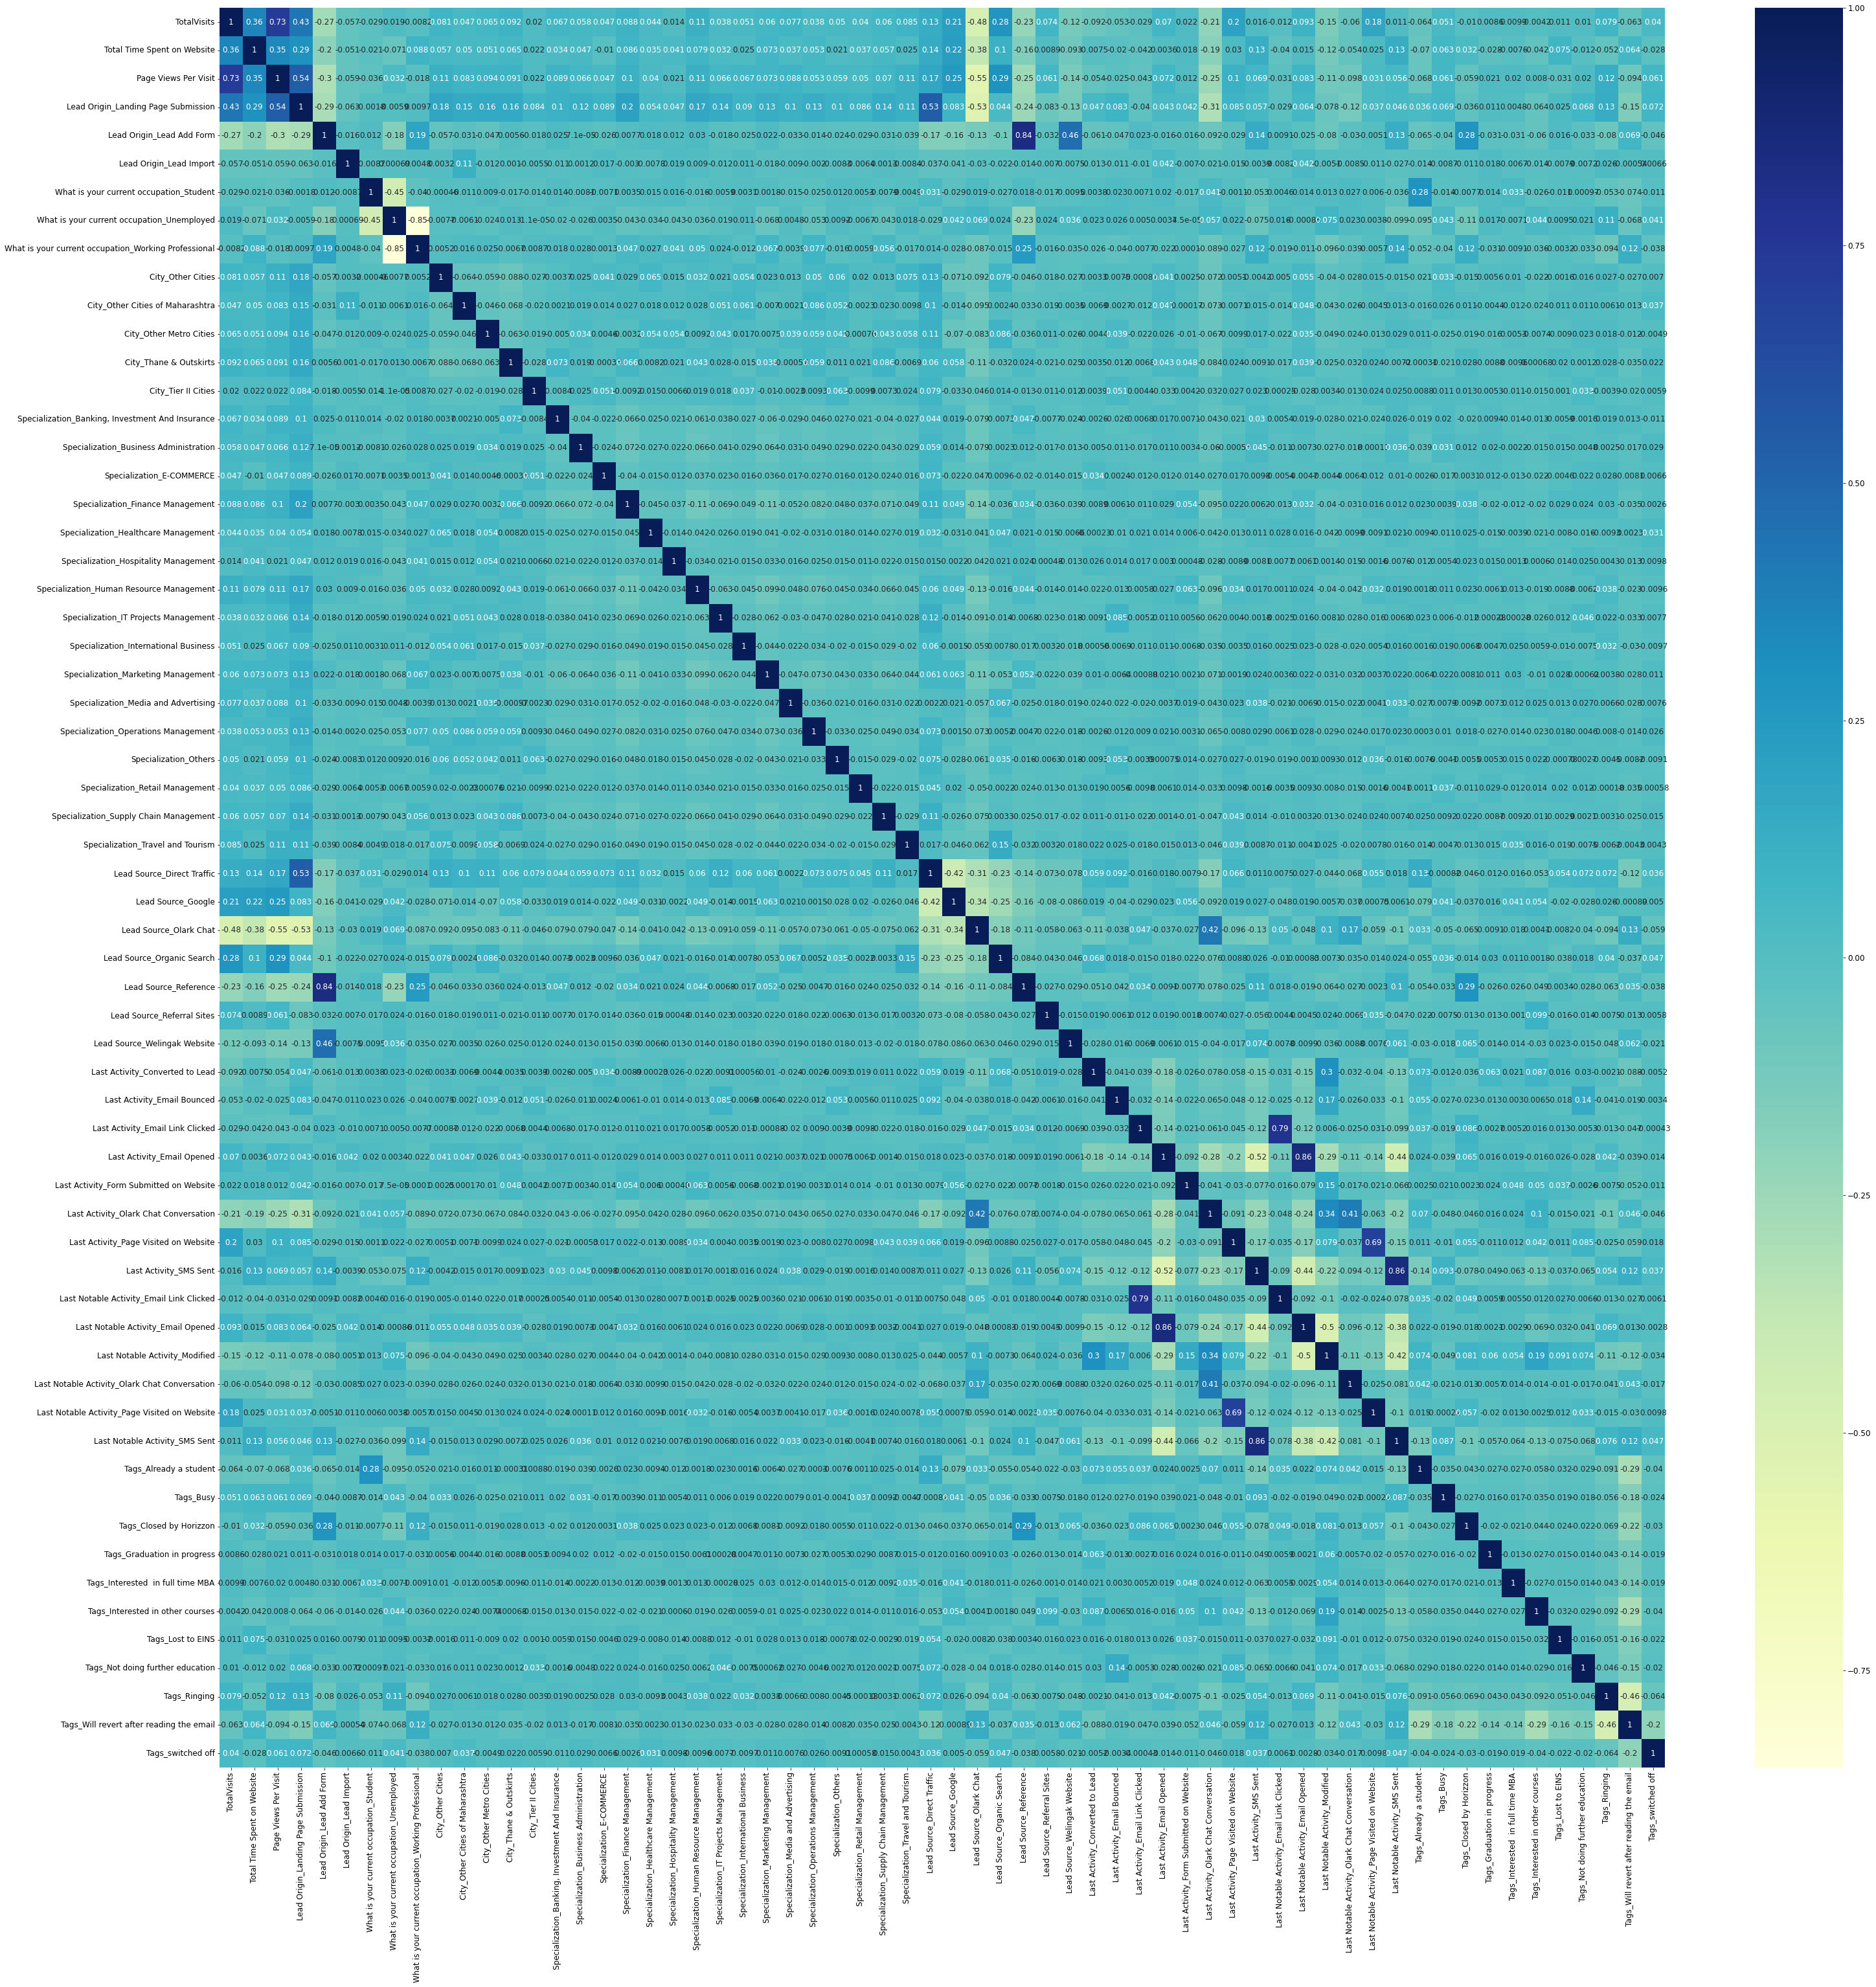

In [122]:
# Checking correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 50))
sea.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<div class="alert alert-block alert-info">
    
### Observation:

- 'Lead Source reffrence' has high correlation with 'Lead orign add form'
- 'Total Visits','Total time spend on website', page views per visit' has strong corelaation between them.

So this given us an idea of where we can find multicollinearity.
</div>

# Step 6: Model Building using Stats Model & RFE:

In [123]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select =15)             # Selecting 15 Features to start
rfe = rfe.fit(X_train, y_train)


In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('What is your current occupation_Student', False, 39),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 37),
 ('City_Other Cities of Maharashtra', False, 46),
 ('City_Other Metro Cities', False, 45),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 36),
 ('Specialization_Banking, Investment And Insurance', False, 10),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_E-COMMERCE', False, 20),
 ('Specialization_Finance Management', False, 16),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 30),
 ('Specialization_Human Resource Management',

In [126]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

### Building Model #1

In [127]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1765.8
Date:                Mon, 14 Nov 2022   Deviance:                       3531.6
Time:                        13:55:30   Pearson chi2:                 9.98e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5347
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2943      0.395     -8.341      0.000      -4.068      -2.520
Total Time Spent on Website                              4.0259      0.186     21.673      0.000       3.662       4.390
Lead Origin_Lead Add Form                                3.4244      0.301     11.374      0.000       2.834       4.014
What is your current occupation_Unemployed              -1.6261      0.354     -4.590      0.000      -2.320      -0.932
What is your current occupation_Working Professional     1.1364      0.434      2.618      0.009       0.286       1.987
Lead Source_Welingak Website                             1.8427      1.063      1.733      0.083      -0.241       3.926
Last Activity_Email Bounced                             -2.0018      0.356     -5.618      0.000      -2.700      -1.303
Last Activity_Olark Chat Conversation                   -1.4633      0.188     -7.788      0.000      -1.832      -1.095
Last Notable Activity_SMS Sent                           2.4193      0.114     21.148      0.000       2.195       2.643
Tags_Already a student                                  -1.5559      0.754     -2.064      0.039      -3.034      -0.078
Tags_Busy                                                2.8281      0.302      9.361      0.000       2.236       3.420
Tags_Closed by Horizzon                                  8.4964      1.037      8.196      0.000       6.465      10.528
Tags_Lost to EINS                                        7.6833      0.648     11.857      0.000       6.413       8.953
Tags_Ringing                                            -1.3980      0.311     -4.490      0.000      -2.008      -0.788
Tags_Will revert after reading the email                 3.4030      0.214     15.911      0.000       2.984       3.822
Tags_switched off                                       -1.6921      0.635     -2.664      0.008      -2.937      -0.447
========================================================================================================================
"""

In [128]:
# # Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,7.20
13,Tags_Will revert after reading the email,5.36
0,Total Time Spent on Website,2.01
12,Tags_Ringing,1.96
3,What is your current occupation_Working Profes...,1.71
1,Lead Origin_Lead Add Form,1.69
7,Last Notable Activity_SMS Sent,1.56
10,Tags_Closed by Horizzon,1.38
4,Lead Source_Welingak Website,1.33
8,Tags_Already a student,1.25


<div class="alert alert-block alert-info">

### Observation:
- p-Value for "Lead Source_Welingak Website" is greater then 0.05
- dropping column with high p-value
</div>

In [129]:
col = col.drop('Lead Source_Welingak Website',1)

### BUILDING MODEL #2

In [130]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1768.2
Date:                Mon, 14 Nov 2022   Deviance:                       3536.4
Time:                        13:55:30   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5344
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3146      0.396     -8.371      0.000      -4.091      -2.539
Total Time Spent on Website                              4.0304      0.186     21.682      0.000       3.666       4.395
Lead Origin_Lead Add Form                                3.7218      0.280     13.299      0.000       3.173       4.270
What is your current occupation_Unemployed              -1.6181      0.355     -4.557      0.000      -2.314      -0.922
What is your current occupation_Working Professional     1.1357      0.435      2.610      0.009       0.283       1.989
Last Activity_Email Bounced                             -1.9671      0.349     -5.629      0.000      -2.652      -1.282
Last Activity_Olark Chat Conversation                   -1.4643      0.188     -7.794      0.000      -1.833      -1.096
Last Notable Activity_SMS Sent                           2.4177      0.114     21.129      0.000       2.193       2.642
Tags_Already a student                                  -1.5415      0.754     -2.044      0.041      -3.019      -0.064
Tags_Busy                                                2.8399      0.303      9.383      0.000       2.247       3.433
Tags_Closed by Horizzon                                  8.5046      1.037      8.201      0.000       6.472      10.537
Tags_Lost to EINS                                        7.6956      0.648     11.871      0.000       6.425       8.966
Tags_Ringing                                            -1.4257      0.314     -4.546      0.000      -2.040      -0.811
Tags_Will revert after reading the email                 3.4165      0.215     15.914      0.000       2.996       3.837
Tags_switched off                                       -1.6794      0.635     -2.643      0.008      -2.925      -0.434
========================================================================================================================
"""

In [131]:
# # Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,7.19
12,Tags_Will revert after reading the email,5.36
0,Total Time Spent on Website,2.01
11,Tags_Ringing,1.96
3,What is your current occupation_Working Profes...,1.69
6,Last Notable Activity_SMS Sent,1.56
9,Tags_Closed by Horizzon,1.38
1,Lead Origin_Lead Add Form,1.35
7,Tags_Already a student,1.25
5,Last Activity_Olark Chat Conversation,1.24


<div class="alert alert-block alert-info">

### Observation:
- Removing "What is your current occupation_Unemployed" has VIF grater then 5.
- dropping column with high VIF
</div>

In [132]:
col = col.drop('What is your current occupation_Unemployed',1)

### BUILDING MODEL #3

In [133]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1779.1
Date:                Mon, 14 Nov 2022   Deviance:                       3558.2
Time:                        13:55:30   Pearson chi2:                 9.84e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5328
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8483      0.223    -21.717      0.000      -5.286      -4.411
Total Time Spent on Website                              4.0417      0.186     21.779      0.000       3.678       4.405
Lead Origin_Lead Add Form                                3.7434      0.278     13.451      0.000       3.198       4.289
What is your current occupation_Working Professional     2.7134      0.264     10.274      0.000       2.196       3.231
Last Activity_Email Bounced                             -1.9238      0.350     -5.491      0.000      -2.610      -1.237
Last Activity_Olark Chat Conversation                   -1.4696      0.187     -7.861      0.000      -1.836      -1.103
Last Notable Activity_SMS Sent                           2.4045      0.114     21.088      0.000       2.181       2.628
Tags_Already a student                                  -1.2357      0.745     -1.659      0.097      -2.696       0.225
Tags_Busy                                                2.7677      0.300      9.212      0.000       2.179       3.357
Tags_Closed by Horizzon                                  8.4263      1.036      8.131      0.000       6.395      10.457
Tags_Lost to EINS                                        7.6276      0.647     11.791      0.000       6.360       8.896
Tags_Ringing                                            -1.5045      0.312     -4.817      0.000      -2.117      -0.892
Tags_Will revert after reading the email                 3.3549      0.213     15.787      0.000       2.938       3.771
Tags_switched off                                       -1.7243      0.635     -2.714      0.007      -2.970      -0.479
========================================================================================================================
"""

In [134]:
# # Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.12
0,Total Time Spent on Website,1.88
5,Last Notable Activity_SMS Sent,1.56
1,Lead Origin_Lead Add Form,1.34
8,Tags_Closed by Horizzon,1.21
4,Last Activity_Olark Chat Conversation,1.18
2,What is your current occupation_Working Profes...,1.17
10,Tags_Ringing,1.15
6,Tags_Already a student,1.06
7,Tags_Busy,1.06




<div class="alert alert-block alert-info">

### Observation:
- p-Value for "Tags_Already a student" is greater then 0.05
- dropping column with high p-value
</div>

In [135]:


col = col.drop('Tags_Already a student',1)

### BUILDING MODEL #4

In [136]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1781.0
Date:                Mon, 14 Nov 2022   Deviance:                       3562.1
Time:                        13:55:30   Pearson chi2:                 9.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5325
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0129      0.212    -23.672      0.000      -5.428      -4.598
Total Time Spent on Website                              4.0484      0.185     21.829      0.000       3.685       4.412
Lead Origin_Lead Add Form                                3.7574      0.279     13.469      0.000       3.211       4.304
What is your current occupation_Working Professional     2.7123      0.262     10.352      0.000       2.199       3.226
Last Activity_Email Bounced                             -1.9241      0.350     -5.493      0.000      -2.611      -1.238
Last Activity_Olark Chat Conversation                   -1.4655      0.187     -7.837      0.000      -1.832      -1.099
Last Notable Activity_SMS Sent                           2.4222      0.114     21.202      0.000       2.198       2.646
Tags_Busy                                                2.9224      0.293      9.960      0.000       2.347       3.498
Tags_Closed by Horizzon                                  8.5886      1.034      8.307      0.000       6.562      10.615
Tags_Lost to EINS                                        7.7900      0.643     12.113      0.000       6.530       9.051
Tags_Ringing                                            -1.3590      0.307     -4.433      0.000      -1.960      -0.758
Tags_Will revert after reading the email                 3.5146      0.201     17.475      0.000       3.120       3.909
Tags_switched off                                       -1.5761      0.633     -2.491      0.013      -2.816      -0.336
========================================================================================================================
"""

In [137]:
# # Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,2.08
0,Total Time Spent on Website,1.84
5,Last Notable Activity_SMS Sent,1.56
1,Lead Origin_Lead Add Form,1.34
7,Tags_Closed by Horizzon,1.21
2,What is your current occupation_Working Profes...,1.17
4,Last Activity_Olark Chat Conversation,1.14
9,Tags_Ringing,1.14
6,Tags_Busy,1.06
8,Tags_Lost to EINS,1.05


<div class="alert alert-block alert-info">
    
### Final Model
- All features p values are less then 0.05
- All features VIF are less then 5
- Consider Model 4 as final model, its time to evaluate it.
    
</div>    
    



## Testing performace of model on arbitrary cut-off value of 0.5.

In [138]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.215069,9196
1,0,0.041674,4696
2,0,0.759238,3274
3,0,0.003085,2164
4,1,0.641343,1667


In [139]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.215069,9196,0
1,0,0.041674,4696,0
2,0,0.759238,3274,1
3,0,0.003085,2164,0
4,1,0.641343,1667,1


In [140]:
from sklearn import metrics

In [141]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

[[3598  284]
 [ 394 1991]]


In [142]:
print('Accuracy (Over All perfromace of the model):',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print('\nSensitivity( How good we are predecting Leads Converted):', TP / float(TP+FN))
print('\nSpecificity( How good we are predecting Leads which are not converted):', TN / float(TN+FP))
print('\nFalse postive rate - predicting converted when customer have not converted:',FP/ float(TN+FP))


Accuracy (Over All perfromace of the model): 0.8918142651986597

Sensitivity( How good we are predecting Leads Converted): 0.8348008385744234

Specificity( How good we are predecting Leads which are not converted): 0.9268418341061309

False postive rate - predicting converted when customer have not converted: 0.07315816589386914


In [143]:
from sklearn.metrics import precision_score, recall_score

print('\nPrecision (Probability that a predicted Leads Converted is actually Converted) :',precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print('\nRecall (Probability that an actual Leads Converted is predicted correctly):',recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))




Precision (Probability that a predicted Leads Converted is actually Converted) : 0.8751648351648351

Recall (Probability that an actual Leads Converted is predicted correctly): 0.8348008385744234


<div class="alert alert-block alert-info">

### Observation of model Performance on Train Set at cutoff 0.5:
- Accuracy: 89 %
- Sensitivity: 83%
- Specificity: 92%
- False postive rate: 7%
- Precision: 87%
- Recall: 83%

</div>

# Step 7: Plotting the ROC Curve

In [144]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

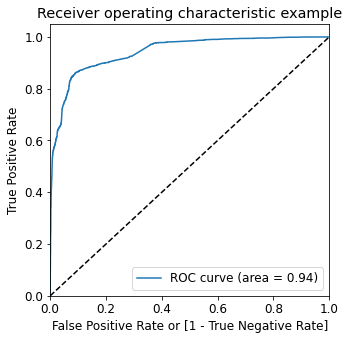

In [146]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<div class="alert alert-block alert-info">
    
### Observation:
- The ROC Curve should be a value close to 1. We are getting a good value of 0.94 indicating a good predictive model.
</div>

# Step 8: Finding Optimal Cutoff Point

#### Earlier we had chosen an arbitrary cut-off value of 0.5. Now using same dataframe we are adding predication for all the probability cutoffs

In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.215069,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.041674,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.759238,3274,1,1,1,1,1,1,1,1,1,0,0
3,0,0.003085,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.641343,1667,1,1,1,1,1,1,1,1,0,0,0


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.751875  0.977358  0.613344
0.2   0.2  0.805489  0.916562  0.737249
0.3   0.3  0.875698  0.878407  0.874034
0.4   0.4  0.890857  0.858281  0.910871
0.5   0.5  0.891814  0.834801  0.926842
0.6   0.6  0.880326  0.787841  0.937146
0.7   0.7  0.868996  0.727883  0.955693
0.8   0.8  0.833254  0.592872  0.980938
0.9   0.9  0.814584  0.524948  0.992530


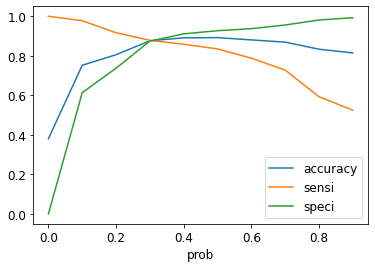

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<div class="alert alert-block alert-info">
    
### Observation:
- As per graph 0.3 is good point to take as a cutoff.
</div>

## Lets check performance of the model on 0.3 cutoff

In [150]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.215069,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.041674,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.759238,3274,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.003085,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.641343,1667,1,1,1,1,1,1,1,1,0,0,0,1


In [151]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

[[3393  489]
 [ 290 2095]]


In [152]:
print('Accuracy (Over All perfromace of the model):',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print('\nSensitivity (How good we are predecting Leads Converted):', TP / float(TP+FN))
print('\nSpecificity(How good we are predecting Leads which are not converted):', TN / float(TN+FP))
print('\nFalse postive rate - predicting converted when customer have not converted:',FP/ float(TN+FP))


Accuracy (Over All perfromace of the model): 0.8918142651986597

Sensitivity (How good we are predecting Leads Converted): 0.8784067085953878

Specificity(How good we are predecting Leads which are not converted): 0.8740340030911901

False postive rate - predicting converted when customer have not converted: 0.12596599690880989


In [153]:
from sklearn.metrics import precision_score, recall_score

print('\nPrecision (Probability that a predicted Leads Converted is actually Converted) :',precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))
print('\nRecall (Probability that an actual Leads Converted is predicted correctly):',recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))



Precision (Probability that a predicted Leads Converted is actually Converted) : 0.8107585139318886

Recall (Probability that an actual Leads Converted is predicted correctly): 0.8784067085953878


In [154]:
# Genrating a score variable
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.215069,9196,0,22
1,0,0.041674,4696,0,4
2,0,0.759238,3274,1,76
3,0,0.003085,2164,0,0
4,1,0.641343,1667,1,64


<div class="alert alert-block alert-info">

### Observation of model Performance on Train Set at cut off 0.3:
- Accuracy: 89 %
- Sensitivity: 87%
- Specificity: 87%
- False postive rate: 12%
- Precision: 81%
- Recall: 87%

</div>

# Step 9: Making predictions on the test set

In [155]:
#Scalling Test Data

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [156]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7681,0.136884,0,0,0,0,1,0,0,0,1,0,0
984,0.080546,0,0,0,0,0,0,0,0,0,0,0
8135,0.401849,0,0,0,0,1,0,0,0,0,1,0
6915,0.062060,0,0,0,0,0,0,0,0,1,0,0
2712,0.110915,0,0,0,0,0,0,0,0,0,1,0


In [157]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [158]:
# Getting the Predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.032437,7681
1,0,0.009132,984
2,0,0.927631,8135
3,0,0.002192,6915
4,1,0.259374,2712


In [159]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))

In [160]:
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.032437,3
1,984,0,0.009132,1
2,8135,0,0.927631,93
3,6915,0,0.002192,0
4,2712,1,0.259374,26


In [161]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [162]:
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.032437,3,0
1,984,0,0.009132,1,0
2,8135,0,0.927631,93,1
3,6915,0,0.002192,0,0
4,2712,1,0.259374,26,0


In [163]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_Predicted )
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

[[1464  212]
 [ 110  900]]


In [164]:
print('Accuracy (Over All perfromace of the model):',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print('\nSensitivity (How good we are predecting Leads Converted):', TP / float(TP+FN))
print('\nSpecificity(How good we are predecting Leads which are not converted):', TN / float(TN+FP))
print('\nFalse postive rate - predicting converted when customer have not converted:',FP/ float(TN+FP))


Accuracy (Over All perfromace of the model): 0.8918142651986597

Sensitivity (How good we are predecting Leads Converted): 0.8910891089108911

Specificity(How good we are predecting Leads which are not converted): 0.8735083532219571

False postive rate - predicting converted when customer have not converted: 0.12649164677804295


In [165]:
from sklearn.metrics import precision_score, recall_score

print('\nPrecision (Probability that a predicted Leads Converted is actually Converted) :',precision_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted))
print('\nRecall (Probability that an actual Leads Converted is predicted correctly):',recall_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted))



Precision (Probability that a predicted Leads Converted is actually Converted) : 0.8093525179856115

Recall (Probability that an actual Leads Converted is predicted correctly): 0.8910891089108911


<div class="alert alert-block alert-info">

### Observation of model Performance on Test Set at cut off 0.3:
- Accuracy: 89 %
- Sensitivity: 89%
- Specificity: 87%
- False postive rate: 12%
- Precision: 80%
- Recall: 89%

</div>

### Top variables in model which contribute positively most towards the probability of a lead getting converted


- Tags_Closed by Horizzon: With very high cofficient of 8.5886 indicates customers with this tag has very high probability to convert.
- Tags_Lost to EINS: With very high cofficient of 7.7900 indicates customers with this tag has very high probability to convert.
- "Total Time Spent on Website": With coefficient 4.0484 indicates customers who spent more time on website has good probability to convert.
- "Lead Origin_Lead Add Form" : With coefficient 3.7574 indicates customers who apply using "Add Form" has high probability to convert more.

### Top variables in model which contribute negatively most towards the probability of a lead getting converted


- Last Activity_Email Bounced: With coefficient -1.9241 indicates customers who has provided wrong email id, has good probability to drop.
- Tags_switched off: With coefficient -1.5761 indicates customers who has phone switched off or provided wrong phone number, has good probability to drop.